## pyautogui

- pyautogui: 어던 응용프로그램이든지 간에 화면상의 어떠한 것이라도 제어할 수 있는 범용적 라이브러리
- 스크린 샷을 찍거나, 마우스를 이동시키거나, 클릭하거나, 키보드 입력을 자동화
- 데스크톱 어플리케이션 테스팅, 자동화, 스크립트 작성

## pyperclip

- pyperclip 파이썬에서 클립보드에 접근하여 텍스트를 복사하고 붙여넣을 수 있는 간단한 크로스 플랫폼 라이브러리
- 텍스트 데이터를 클립보드로 복사하거나 클립보드에서 텍스트 데이터를 가져오는 기능
- 자동화 업무 및 크롤링에서 응용하여 사용

In [13]:
# !pip install pyautogui

In [18]:
import pyautogui
import pyperclip
import time

In [15]:
# 현재 화면상에 존재하는 커서의 좌표를 출력
a = pyautogui.position()

In [20]:
pyautogui.moveTo(a)
pyautogui.click()

# 검색창에 글을 입력
pyperclip.copy(' test word') # 특정 텍스트를 클립보드에 복사

# 클립보드에 있는 텍스트를 출력
# hotkey(): 키보드 상의 특정 키를 조합하여 입력
pyautogui.hotkey('ctrl', 'v')

time.sleep(1)
pyautogui.write(['enter'])

In [21]:
# 캡처할 좌츨 상단 좌표
pyautogui.position()

Point(x=1066, y=243)

In [22]:
# 캡처할 우측 하단 좌표
pyautogui.position()

Point(x=1643, y=738)

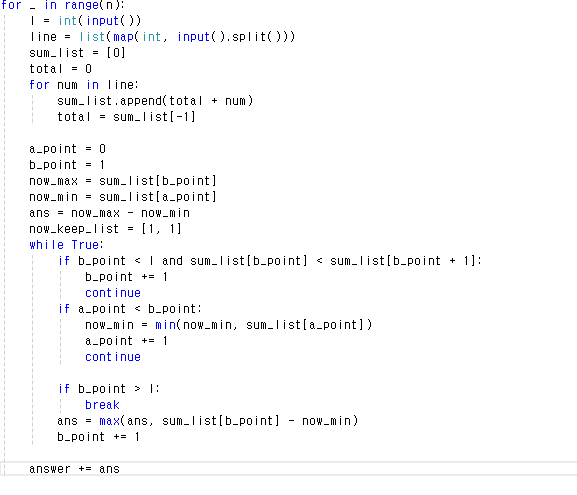

In [24]:
# 특정 좌표 범위에 해당하는 화면을 스크린 샷
pyautogui.screenshot('사진.png', region=(1066, 243, 1643-1066, 738-243))

In [25]:
from selenium import webdriver

In [26]:
url = 'https://naver.com'
driver = webdriver.Chrome()
driver.get(url)

In [28]:
driver.execute_script('window.scrollTo(0, 10000);')

In [40]:
# 1. 잡플래닛(https://www.jobplanet.co.kr/)사이트에 아래의 아이드와 패스워드로 로그인하여, 
# "금융감독원" 기업의 직원들 인적정보/한줄평/장점/단점/바라는점/도움점수 등을 아래와 같이 수집하여 
# company.csv파일로 저장하시오. (15 페이지 까지 수집)
# - id : [hanaro.data.win@gmail.com](mailto:hanaro.data.win@gmail.com)
# - pw : hanaro250101!#

# 필요 라이브러리 호출
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [41]:
# 페이지 접속하기
driver = webdriver.Chrome()
driver.get('https://www.jobplanet.co.kr/users/sign_in?_nav=gb')

In [42]:
# 정보 입력
driver.find_element(By.XPATH, '//*[@id="user_email"]').send_keys('hanaro.data.win@gmail.com')
driver.find_element(By.XPATH, '//*[@id="user_password"]').send_keys('hanaro250101!#')
driver.find_element(By.XPATH, '//*[@id="signInSignInCon"]/div[2]/div/section[2]/fieldset/button').click()

In [43]:
driver.find_element(By.XPATH, '//*[@id="search_bar_search_query"]').send_keys('금융감독원')

In [44]:
from selenium.webdriver.common.keys import Keys

driver.find_element(By.XPATH, '//*[@id="search_bar_search_query"]').send_keys(Keys.ENTER)

In [45]:
from bs4 import BeautifulSoup

url = 'https://www.jobplanet.co.kr/companies/43469/reviews/%EA%B8%88%EC%9C%B5%EA%B0%90%EB%8F%85%EC%9B%90'
driver.get(url)

In [53]:
html_data = driver.page_source
html = BeautifulSoup(html_data)

hr_grid = html.find_all('section', class_='relative bg-white border border-gray-100 px-[56px] py-[36px] rounded-[12px] first:rounded-none first:rounded-bl-[12px] first:rounded-br-[12px] is-expand')
hr_data = hr_grid[-1].find_all('span', class_="text-body2 text-gray-400")
[x.get_text() for x in hr_data]

['금융/재무', '현직원', '서울', '2025. 01 작성']

In [59]:
hr_grid[1].find('h2', class_='relative text-h7 text-gray-800 break-all').text

'같이 일하는 사람들이 젠틀하고 사무실 분위기가 아주 좋습니다. 배리굿'

In [61]:
hr_grid[1].find('div', class_='whitespace-pre-wrap break-all text-body2 text-gray-800 space-x-[8px]').text

'장점팀장님이 인간적으로 대해주며 항상 배려해주는 말이 매너가 너무 좋습니다.'

In [68]:
hr_hope = hr_grid[1].find_all('div', class_='mt-[20px] whitespace-pre-wrap break-all text-body2 text-gray-800')
hr_hope[0].text

'단점조용해서 의사소통이 적은 것이 흠이고 상담직이라 점심시간이 촉박하고 시간이 금방 지나갑니다.'

In [69]:
hr_hope[1].text

'경영진에 바라는 점직원들간에 의사소통이 더욱 필요하고 직원생일파티 등 적극적인 회사생활이 필요합니다.'

In [76]:
# 기업 성장 추천여부 데이터
hr_recomm = hr_grid[1].find_all('div', class_='inline-flex items-center leading-[normal] bg-white border border-gray-100 text-gray-500 h-[28px] px-[8px] text-small1 font-medium rounded-[4px]')
[x.get_text() for x in hr_recomm]

['1년 후에도 비슷할 것 같아요', '기업을 추천해요']

In [70]:
hr_grid[1].find('span', class_='inline pl-[2px]').text

'0'

In [77]:
# 수집된 정보를 담을 리스트를 먼저 구성
hr_all = {'part':[], 'former':[], 'regions':[], 'date':[], 'text':[], 'good':[], 'bad':[], 'hope':[], 'same':[], 'recom':[], 'help':[]}

In [78]:
# 한 페이지 내 정보를 수집하는 코드를 함수형태로 작성
def collection_data(driver, hr_grid, hr_all):
    for k in range(0,5): # 한페이지에 5개의 글이 존재
        try:
            grid_component = hr_grid[k]
            hr_data = grid_component.find_all('span',class_='text-body2 text-gray-400')
            hr_list = [x.get_text() for x in hr_data]
            hr_all['part'].append(hr_list[0])
            hr_all['former'].append(hr_list[1])
            hr_all['regions'].append(hr_list[2])
            hr_all['date'].append(hr_list[3])
            # 한줄 평 수집
            hr_all['text'].append(grid_component.find('h2', class_='relative text-h7 text-gray-800 break-all').text)
            # 기업 장점 수집
            hr_all['good'].append(grid_component.find('div', class_='whitespace-pre-wrap break-all text-body2 text-gray-800 space-x-[8px]').text)
            # 기업 단점 / 경영진 바라는 점 수집
            hr_hope= grid_component.find_all('div',
                                  class_='mt-[20px] whitespace-pre-wrap break-all text-body2 text-gray-800')
            hr_all['bad'].append(hr_hope[0].text)
            # 바라는 점
            hr_all['hope'].append(hr_hope[1].text)
            # 기업 성장/추천 여부
            hr_recomm = grid_component.find_all('div',
                              class_='inline-flex items-center leading-[normal] bg-white border border-gray-100 text-gray-500 h-[28px] px-[8px] text-small1 font-medium rounded-[4px]')
            hr_recomm_list = [x.get_text() for x in hr_recomm]
            hr_all['same'].append(hr_recomm_list[0])
            hr_all['recom'].append(hr_recomm_list[1])
            hr_all['help'].append(grid_component.find('span',class_='inline pl-[2px]').text)
        # 수집 과정에서 오류 확인
        except:
            print('수집 오류')
        finally:
            pass

In [ ]:
driver = webdriver.Chrome()
driver.get('https://www.jobplanet.co.kr/users/sign_in?_nav=gb')
driver.implicitly_wait(10)
#아이디 패스워드 입력
driver.find_element(By.XPATH,'//*[@id="user_email"]').send_keys('hanaro.data.win@gmail.com')
driver.find_element(By.XPATH,'//*[@id="user_password"]').send_keys('hanaro250101!#')
# 로그인 클릭
driver.find_element(By.XPATH,'//*[@id="signInSignInCon"]/div[2]/div/section[2]/fieldset/button').click()
# 페이징 처리
for i in range(1, 20): # 19페이지 까지 수집
    try: #페이지 접속에 문제가 없는지 확인
        url = 'https://www.jobplanet.co.kr/companies/43469/reviews/%EA%B8%88%EC%9C%B5%EA%B0%90%EB%8F%85%EC%9B%90?page=' + str(i)
        # 페이지 접속하기
        driver.get(url)
        time.sleep(np.random.rand()+2)
        driver.get(url)
        # 브라우저 내 팝업창의 경우, 한번 더 접속하면 사라짐!
        time.sleep(np.random.rand()+3)
        driver.execute_script("window.scrollTo(0, 10000);")
        html = BeautifulSoup(driver.page_source)
        time.sleep(np.random.rand()+3)
        # 페이지 내 각 게시글에 있는 정보 수집
        hr_grid = html.find_all('section',
                            class_='relative bg-white border border-gray-100 px-[56px] py-[36px] rounded-[12px] first:rounded-none first:rounded-bl-[12px] first:rounded-br-[12px] is-expand')
        # 페이지 내 데이터 수집 함수 동작
        collection_data(driver, hr_grid, hr_all)
        time.sleep(np.random.rand()+4)
    except :
        print('페이지 오류')
    finally:
        pass

In [80]:
collection_data(driver, hr_grid, hr_all)
pd.DataFrame(hr_all)

,part,former,regions,date,text,good,bad,hope,same,recom,help
0,교육,전직원,서울,2025. 04 작성,나쁘지않은 근무환경과 동기들의 인성이 좋았습니다.,"장점금융 대기업, 커리어발전에 굉장히 좋은 회사입니다. 슈퍼갑","단점맛있는 밥, 하지만 매번 똑같은 옥상에서의 풍경, 경치가 그리좋지 않아요",경영진에 바라는 점복지를 좀 더 늘려줬으면 합니다. 식대를 좀 지원좀해주세요,1년 후에도 비슷할 것 같아요,기업을 추천해요,1
1,전문직,전직원,서울,2025. 03 작성,같이 일하는 사람들이 젠틀하고 사무실 분위기가 아주 좋습니다. 배리굿,장점팀장님이 인간적으로 대해주며 항상 배려해주는 말이 매너가 너무 좋습니다.,단점조용해서 의사소통이 적은 것이 흠이고 상담직이라 점심시간이 촉박하고 시간이 금방...,경영진에 바라는 점직원들간에 의사소통이 더욱 필요하고 직원생일파티 등 적극적인 회사...,1년 후에도 비슷할 것 같아요,기업을 추천해요,0
2,기획/경영,전직원,서울,2025. 03 작성,"단순 업무, 하지만 시기를 잘못..선택하면...","장점칼퇴가능, 쉽게 조퇴 및 휴가 가능합니다. \n구내식당이 맛있다.","단점너무 업무가 단순하고, 업무 안에서 배울 수 있는 것이 많이 없다.",경영진에 바라는 점업무 분배를 잘 해주셨으면 좋을 것 같다..,1년 후에도 비슷할 것 같아요,기업을 추천하지 않아요,0
3,금융/재무,현직원,서울,2025. 03 작성,소소합니다 그냥 평범합니다 금융공기업,장점공기업의 위엄이 다르지요 앞다투어 들어오는 그런곳입ㅂ니다,단점아무런 변화가 없는것 같은 그런 모습들 무엇이 맞는것인지,경영진에 바라는 점변화를 원하질 않고 자기의 안위만 쳉기지말자,1년 후에도 비슷할 것 같아요,기업을 추천해요,0
4,금융/재무,현직원,서울,2025. 01 작성,금융 분야 공익에서의 최고 직장입니다,장점금융분야에서 공적인 일을 하고 싶다면 추천\n금융 정책 및 규제에서 전문성을 쌓...,단점모든 공공 분야가 그렇지만 복지다 점점 감소하고 있다.,경영진에 바라는 점경영진이 낙하산으로 오기 때문에 단기적인 시각을 가지고 있다 구성...,1년 후에도 비슷할 것 같아요,기업을 추천해요,1


In [ ]:
# 2.  네이버에 '하나은행'과 관련된 뉴스 기사를 검색하여, 상위 40개의 뉴스 기사의 제목과 내용을 수집하시오. 